In [ ]:
# This reads in time-series photometry and does a PCA reduction of the brightest stars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
time_series = pd.read_csv("test_time_series.csv", index_col=0)

In [38]:
# PCA function partly cribbed from https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

def pca(X):
    # X: data matrix, assumes 0-centered
    # N: number of PCA basis vectors to project data onto
    n, m = X.shape
    assert np.allclose(X.mean(axis=0), np.zeros(m))
    # Compute covariance matrix
    C = np.dot(X.T, X) / (n-1)
    # Eigen decomposition
    eigen_vals, eigen_vecs = np.linalg.eig(C)
    # Project X onto PC space; these are the eigenvectors of the data
    X_pca = np.dot(X, eigen_vecs)
    
    # determine cumulative explained variance
    variance_explained = []
    for i in eigen_vals:
        variance_explained.append((i/sum(eigen_vals)))
        
    cumulative_variance_explained = np.cumsum(variance_explained)
    
    return X_pca, cumulative_variance_explained

In [43]:
# return number of components that explain X amount of variance
# (note number can be a decimal)

def num_comps_var(variance_expl,variance_target):
    
    # abcissa (number of components); start with 1
    abcissa = np.add(1.,np.arange(len(variance_expl)))
    
    # interpolate (note a flipping of axes is necessary)
    comps_interp = np.interp(x=variance_target,xp=variance_expl,fp=abcissa)
    
    return comps_interp

'\nplt.xlabel("Frame number (~5 hr observation duration)")\nplt.ylabel("Direct counts (no sky subtraction)")\nplt.show()\n'

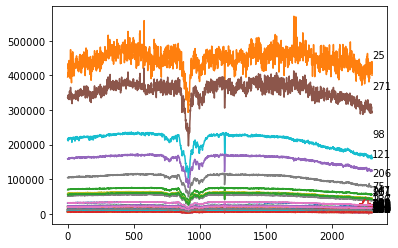

In [39]:
# make plot of photometry, with annotations to identify stars

list_brightest = [] # initialize list of brightest stars
for (columnName, columnData) in time_series.iteritems():
    #print('Column Name : ', columnName)
    if np.median(columnData.values) > 5000:
        plt.plot(columnData.values)
        plt.annotate(str(columnName), xy=(2300,np.median(columnData.values)), xycoords="data")
        list_brightest.append(str(columnName))
'''
plt.xlabel("Frame number (~5 hr observation duration)")
plt.ylabel("Direct counts (no sky subtraction)")
plt.show()
'''

In [40]:
# option to remove any stars that may be intrinsically variable

#list_brightest.remove("25")
#list_brightest.remove("271")

In [41]:
# select the bright stars we want, and whiten the data

# separate out the photometry from the brightest stars
x = time_series.loc[:, list_brightest].values

# standardize the photometry
x_scaled = StandardScaler().fit_transform(x)

In [42]:
# get dataset projected onto eigenvectors, and the explained variance

x_pca, variance_expl = pca(x_scaled)

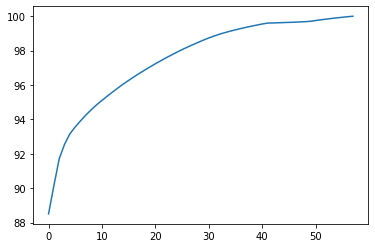

In [14]:
# plot explained variance

'''
plt.plot(variance_expl)
plt.show()
'''

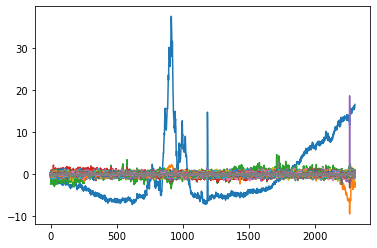

In [29]:
# plot eigenvectors
'''
for i in range(0,len(x_pca[0,:])):
    plt.plot(x_pca[:,i])
plt.show()
'''

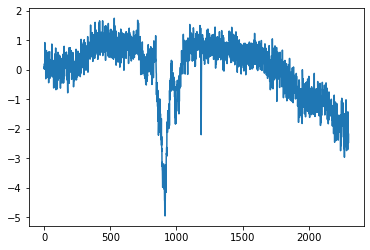

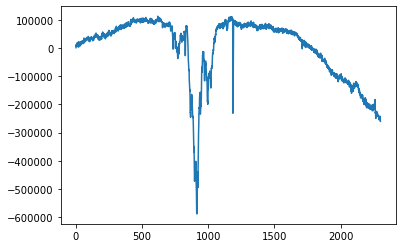

In [77]:
plt.plot(single_star_data, label="empirical, post-scaling")
plt.show()

plt.plot(recon_light_curve,label="reconstructed")
plt.show()

In [39]:
# ... subtract these first components from the data 

#photometry_decorr = np.subtract(time_series["21"].values,np.dot(projection_matrix,e_vals_dominant))

In [42]:
plt.plot(photometry_decorr)
plt.show()